In [2]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import numpy as np
import matplotlib.path as mpath


# additional configuration (optional)
%config InlineBackend.figure_format = 'retina'

from dask.distributed import Client #client is the interface to
from dask.distributed import LocalCluster #Start the cluster locally
cluster = LocalCluster()
client = Client(cluster) #Connect the client to the c
client

/nbhome/Rebecca.Beadling/miniconda/envs/python38_latestxarray/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46041 instead
  warnings.warn(


Client Scheduler: tcp://127.0.0.1:38887 Dashboard: http://127.0.0.1:46041/status,Cluster Workers: 4 Cores: 8 Memory: 33.22 GB


In [6]:
######### Load static and t_ref output for control and each ensemble member for the experiments:
######### Will need to dmget all files and change paths after I remove these from my /net2 drive,
######### but okay for now.

ds_static = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/piControl/ocean_monthly.static.nc')

ds_so_control = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/piControl/ocean_annual_z.0101-0270.so.nc',
                    chunks={'time':5,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'])

#### fafantwater members
ds_so_fafantwater_101 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwater_101/ocean_annual_z.0151-0170.so.nc',
                    chunks={'time':5,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'])
ds_so_fafantwater_151 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwater_151/ocean_annual_z.0051-0070.so.nc',
                   chunks={'time':5,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'])
ds_so_fafantwater_201 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwater_201/ocean_annual_z.0051-0070.so.nc',
                    chunks={'time':5,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'])

#### fafantwaterstress members
ds_so_fafantwaterstress_101 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwaterstress_101/ocean_annual_z.0151-0170.so.nc',
                    chunks={'time':5,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'])
ds_so_fafantwaterstress_151 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwaterstress_151/ocean_annual_z.0051-0070.so.nc',
                    chunks={'time':5,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'])
ds_so_fafantwaterstress_201 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwaterstress_201/ocean_annual_z.0051-0070.so.nc',
                    chunks={'time':5,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'])

#### fafstress members
ds_so_fafstress_101 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafstress_101/ocean_annual_z.0151-0170.so.nc',
                    chunks={'time':5,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'])
ds_so_fafstress_151 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafstress_151/ocean_annual_z.0051-0070.so.nc',
                    chunks={'time':5,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'])
ds_so_fafstress_201 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafstress_201/ocean_annual_z.0051-0070.so.nc',
                    chunks={'time':5,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'])

In [7]:
##### ANTWATER ENSEMBLE AVERAGE
##### Since the ESM4 simulations have different start dates (0001 vs 0101) need to do the time averages
##### first and then create the ensembles.
fafantwater_mean_101 = ds_so_fafantwater_101.so.sel(time=slice('0151-07-02','0170-07-02'),z_l=2.5).mean(dim='time')
fafantwater_mean_151 = ds_so_fafantwater_151.so.sel(time=slice('0051-07-02','0070-07-02'),z_l=2.5).mean(dim='time')
fafantwater_mean_201 = ds_so_fafantwater_201.so.sel(time=slice('0051-07-02','0070-07-02'),z_l=2.5).mean(dim='time')

fafantwater_ensemble = xr.concat([fafantwater_mean_101,fafantwater_mean_151,fafantwater_mean_201],dim='member')
fafantwater_ensemble_mean = fafantwater_ensemble.mean(dim='member')

##### ANTWATER-STRESS ENSEMBLE AVERAGE
fafantwaterstress_mean_101 = ds_so_fafantwaterstress_101.so.sel(time=slice('0151-07-02','0170-07-02'),z_l=2.5).mean(dim='time')
fafantwaterstress_mean_151 = ds_so_fafantwaterstress_151.so.sel(time=slice('0051-07-02','0070-07-02'),z_l=2.5).mean(dim='time')
fafantwaterstress_mean_201 = ds_so_fafantwaterstress_201.so.sel(time=slice('0051-07-02','0070-07-02'),z_l=2.5).mean(dim='time')

fafantwaterstress_ensemble = xr.concat([fafantwaterstress_mean_101,fafantwaterstress_mean_151,fafantwaterstress_mean_201],dim='member')
fafantwaterstress_ensemble_mean = fafantwaterstress_ensemble.mean(dim='member')

##### STRESS ENSEMBLE AVERAGE
fafstress_mean_101 = ds_so_fafstress_101.so.sel(time=slice('0151-07-02','0170-07-02'),z_l=2.5).mean(dim='time')
fafstress_mean_151 = ds_so_fafstress_151.so.sel(time=slice('0051-07-02','0070-07-02'),z_l=2.5).mean(dim='time')
fafstress_mean_201 = ds_so_fafstress_201.so.sel(time=slice('0051-07-02','0070-07-02'),z_l=2.5).mean(dim='time')

fafstress_ensemble = xr.concat([fafstress_mean_101,fafstress_mean_151,fafstress_mean_201],dim='member')
fafstress_ensemble_mean = fafstress_ensemble.mean(dim='member')

##### PICONTROl 100-yr AVE:
piControl_100yr_ave = ds_so_control.so.sel(time=slice('0121-07-02','0220-07-02'),z_l=2.5).mean(dim='time')

##### COMPUTE DIFFERENCES BETWEEN EXPS AND PICONTROL
difference_antwater = fafantwater_ensemble_mean - piControl_100yr_ave
difference_antwaterstress = fafantwaterstress_ensemble_mean - piControl_100yr_ave
difference_stress = fafstress_ensemble_mean - piControl_100yr_ave

In [8]:
### Compute areaweighted global average SSS and SSS south of 55S for piControl:
piControl_100yr = ds_so_control.so.sel(time=slice('0121-07-02','0220-07-02'),z_l=2.5)

#Compute areaweighted global mean sss
piControl_S_area_w = piControl_100yr*ds_static.areacello*ds_static.wet
area = ds_static.areacello*ds_static.wet
numerator_control_global = piControl_S_area_w.sum(dim=['xh','yh'])
denominator_control_global = area.sum(dim=['xh','yh'])

sss_ave_control = numerator_control_global/denominator_control_global
sss_ave_control.mean(dim='time').values, sss_ave_control.std(dim='time').values

#Compute areaweighted global mean sss south of 55S
numerator_control_55 = piControl_S_area_w.sel(yh=slice(-90,-55)).sum(dim=['xh','yh'])
denominator_control_55 = area.sel(yh=slice(-90,-55)).sum(dim=['xh','yh'])

sss_ave_control_south_55 = numerator_control_55/denominator_control_55
sss_ave_control_south_55.mean(dim='time').values, sss_ave_control_south_55.std(dim='time').values

(array(33.92784, dtype=float32), array(0.03669097, dtype=float32))

In [9]:
#Compute global average SST for perturbation experiments
fafantwater_mean_101 = ds_so_fafantwater_101.so.sel(time=slice('0051-07-02','0170-07-02'),z_l=2.5)
fafantwater_mean_151 = ds_so_fafantwater_151.so.sel(time=slice('0051-07-02','0070-07-02'),z_l=2.5)
fafantwater_mean_201 = ds_so_fafantwater_201.so.sel(time=slice('0051-07-02','0070-07-02'),z_l=2.5)

fafantwater_time_mean_101 = fafantwater_mean_101.mean(dim='time')
fafantwater_time_mean_151 = fafantwater_mean_151.mean(dim='time')
fafantwater_time_mean_201 = fafantwater_mean_201.mean(dim='time')

fafantwater_ensemble = xr.concat([fafantwater_time_mean_101,fafantwater_time_mean_151,fafantwater_time_mean_201],dim='member')
fafantwater_ensemble_mean = fafantwater_ensemble.mean(dim='member')

#compute area-weighted global mean sst
fafantwater_mean_101_S_area_w = fafantwater_mean_101*ds_static.areacello*ds_static.wet
fafantwater_mean_151_S_area_w = fafantwater_mean_151*ds_static.areacello*ds_static.wet
fafantwater_mean_201_S_area_w = fafantwater_mean_201*ds_static.areacello*ds_static.wet
fafantwater_ens_mean_area_w = fafantwater_ensemble_mean*ds_static.areacello*ds_static.wet

area = ds_static.areacello*ds_static.wet

#Compute areaweighted global mean sst

numerator_fafantwater_101_global = fafantwater_mean_101_S_area_w.sum(dim=['xh','yh'])
numerator_fafantwater_151_global = fafantwater_mean_151_S_area_w.sum(dim=['xh','yh'])
numerator_fafantwater_201_global = fafantwater_mean_201_S_area_w.sum(dim=['xh','yh'])
numerator_fafantwater_ens_mean_global = fafantwater_ens_mean_area_w.sum(dim=['xh','yh'])

denominator_global = area.sum(dim=['xh','yh'])

ave_sss_global_fafantwater_101 = numerator_fafantwater_101_global/denominator_global
ave_sss_global_fafantwater_151 = numerator_fafantwater_151_global/denominator_global
ave_sss_global_fafantwater_201 = numerator_fafantwater_201_global/denominator_global
ave_sss_global_fafantwater_ens = numerator_fafantwater_ens_mean_global/denominator_global

ave_sss_global_fafantwater_101.std(dim='time').values, ave_sss_global_fafantwater_151.std(dim='time').values, ave_sss_global_fafantwater_201.std(dim='time').values, ave_sss_global_fafantwater_ens.values

(array(0.00757103, dtype=float32),
 array(0.00760938, dtype=float32),
 array(0.00745273, dtype=float32),
 array(34.506645, dtype=float32))

In [10]:
#Compute average SST south of 55S for perturbation experiments

#Compute areaweighted global mean sst

numerator_fafantwater_101_55 = fafantwater_mean_101_S_area_w.sel(yh=slice(-90,-55)).sum(dim=['xh','yh'])
numerator_fafantwater_151_55 = fafantwater_mean_151_S_area_w.sel(yh=slice(-90,-55)).sum(dim=['xh','yh'])
numerator_fafantwater_201_55 = fafantwater_mean_201_S_area_w.sel(yh=slice(-90,-55)).sum(dim=['xh','yh'])
numerator_fafantwater_ens_mean_55 = fafantwater_ens_mean_area_w.sel(yh=slice(-90,-55)).sum(dim=['xh','yh'])

denominator_55 = area.sel(yh=slice(-90,-55)).sum(dim=['xh','yh'])

ave_sss_55_fafantwater_101 = numerator_fafantwater_101_55/denominator_55
ave_sss_55_fafantwater_151 = numerator_fafantwater_151_55/denominator_55
ave_sss_55_fafantwater_201 = numerator_fafantwater_201_55/denominator_55
ave_sss_55_fafantwater_ens = numerator_fafantwater_ens_mean_55/denominator_55

ave_sss_55_fafantwater_101.std(dim='time').values, ave_sss_55_fafantwater_151.std(dim='time').values, ave_sss_55_fafantwater_201.std(dim='time').values, ave_sss_55_fafantwater_ens.values 

(array(0.01320678, dtype=float32),
 array(0.01797189, dtype=float32),
 array(0.01049408, dtype=float32),
 array(33.751457, dtype=float32))

In [11]:
## Function to set up Antarctic polar projection:
### Antarctic map for plotting:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

depth = ds_static['deptho']
depth

shelf = depth.where(depth<1000)*0
shelf_mask = shelf.isin(0)

import matplotlib.ticker as mticker

def antarctic_map(ax, grid):
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_extent([-180, 180, -90, -55], ccrs.PlateCarree())
    ax.contour(ds_static.xh,ds_static.yh,shelf_mask,colors='black',linewidths = 0.5,transform=ccrs.PlateCarree())
    if grid == True:
        gl = ax.gridlines(linewidth = 1, color = 'grey', linestyle = '--')
        gl.ylocator = mticker.FixedLocator([-90, -80, -70, -60, -50])

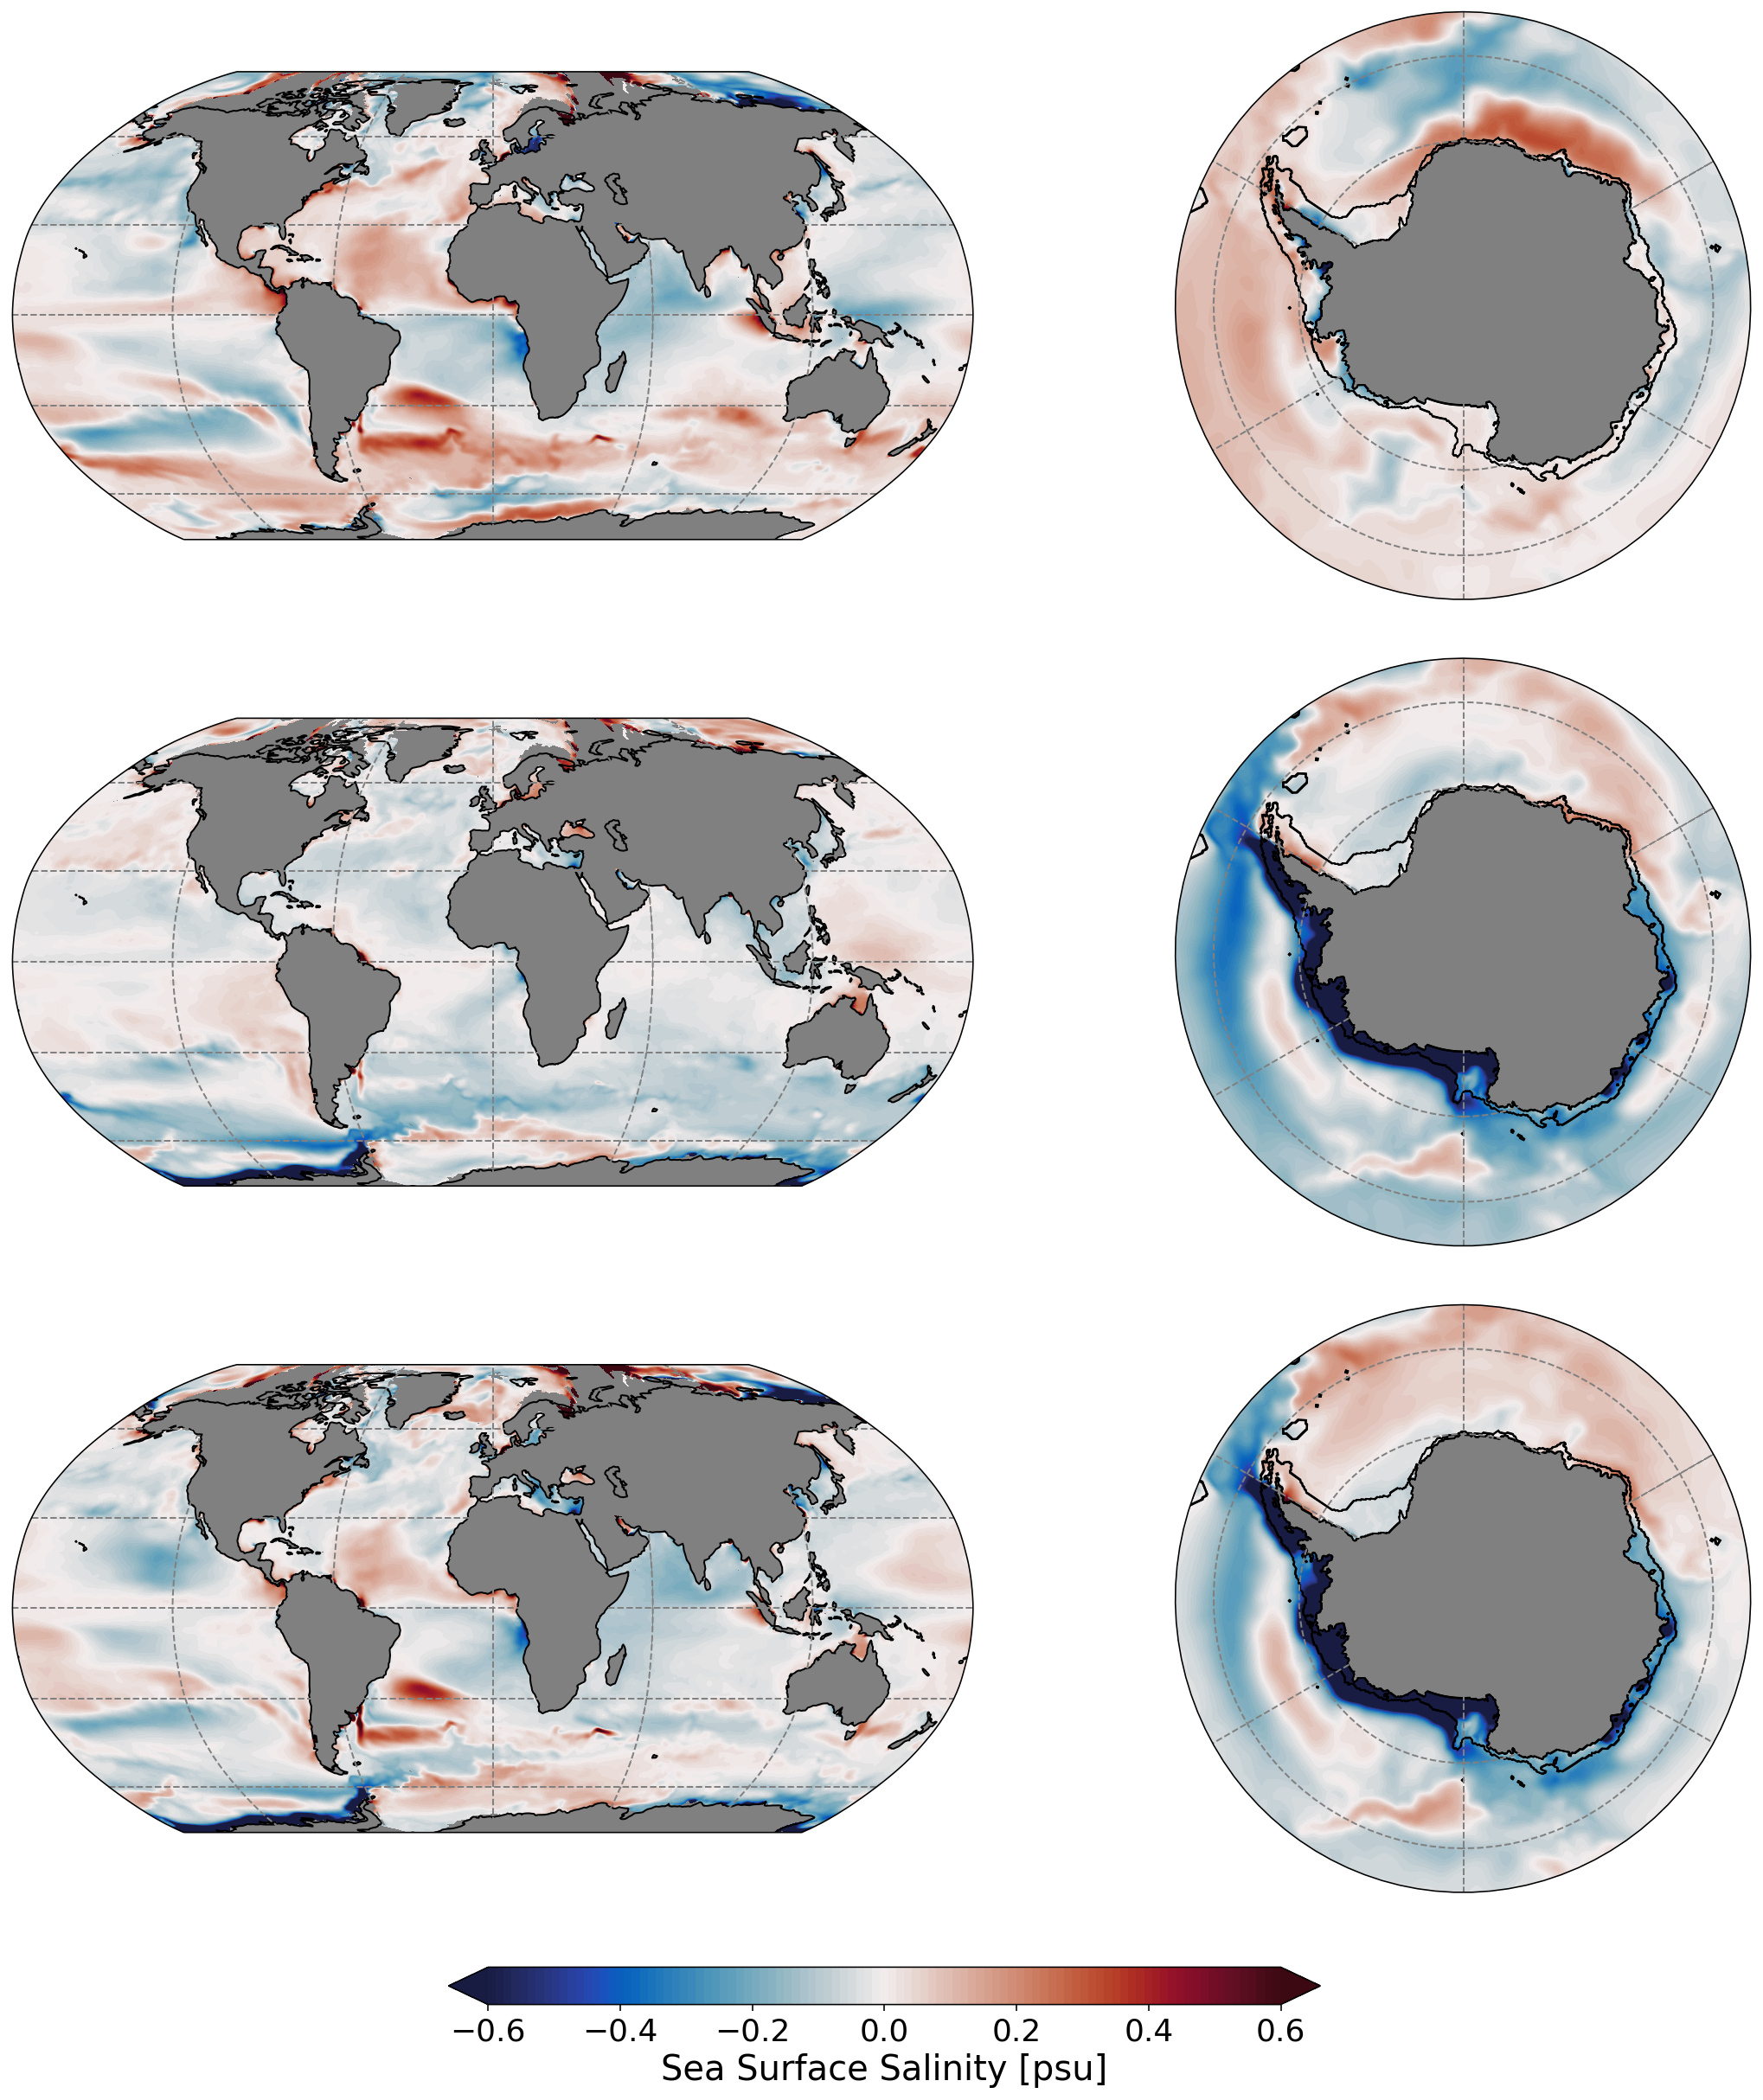

In [12]:
## Plot SSS global and polar projections
from matplotlib import gridspec

fig, ax  = plt.subplots(3,2, figsize = (20,20))
gs = gridspec.GridSpec(3,2)

ax0, ax1, ax2, ax3, ax4, ax5 = plt.subplot(gs[0,0],projection=ccrs.Robinson(),facecolor='grey'),plt.subplot(gs[0,1],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                               plt.subplot(gs[1,0],projection=ccrs.Robinson(),facecolor='grey'),plt.subplot(gs[1,1],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                               plt.subplot(gs[2,0],projection=ccrs.Robinson(),facecolor='grey'),plt.subplot(gs[2,1],projection=ccrs.SouthPolarStereo(),facecolor='grey')

gs.update(hspace = 0.1, wspace = 0.01)                                           

lon_so_esm4 = ds_so_control.xh.values
lat_so_esm4 = ds_so_control.yh.values
x_so_esm4,y_so_esm4 = np.meshgrid(lon_so_esm4,lat_so_esm4)

levels_sss_diff = np.linspace(-0.6,0.6,100)

## Global maps
ax0.contourf(x_so_esm4,y_so_esm4,difference_stress.values,cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(),levels=levels_sss_diff,extend='both')
ax2.contourf(x_so_esm4,y_so_esm4,difference_antwater.values,cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(),levels=levels_sss_diff,extend='both')
ax4.contourf(x_so_esm4,y_so_esm4,difference_antwaterstress.values,cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(),levels=levels_sss_diff,extend='both')

g1 = ax0.gridlines(linewidth = 1, color = 'grey', linestyle = '--')
g1 = ax2.gridlines(linewidth = 1, color = 'grey', linestyle = '--')
g1 = ax4.gridlines(linewidth = 1, color = 'grey', linestyle = '--')

ax0.coastlines()
ax2.coastlines()
ax4.coastlines()

## Polar Projections
antarctic_map(ax1, grid = True)
antarctic_map(ax3, grid = True)
antarctic_map(ax5, grid = True)

ax1.contourf(x_so_esm4,y_so_esm4,difference_stress.values,cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(),levels=levels_sss_diff,extend='both')
ax3.contourf(x_so_esm4,y_so_esm4,difference_antwater.values,cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(),levels=levels_sss_diff,extend='both')
ax5.contourf(x_so_esm4,y_so_esm4,difference_antwaterstress.values,cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(),levels=levels_sss_diff,extend='both')

## Add Horizontal color bars at bottom:
cbr_sss_diff = ax0.contourf(x_so_esm4,y_so_esm4,difference_stress.values,cmap=cmocean.cm.balance,transform=ccrs.PlateCarree(),levels=levels_sss_diff,extend='both')
cax = fig.add_axes([0.30, 0.08, 0.35, 0.015])

cbar_1=plt.colorbar(cbr_sss_diff,cax=cax,orientation='horizontal',shrink=0.5,ticks = [-0.6,-0.4,-0.2,0,0.2,0.4,0.6])
cbar_1.ax.tick_params(labelsize=18)
cbar_1.set_label('Sea Surface Salinity [psu]', fontsize=20)

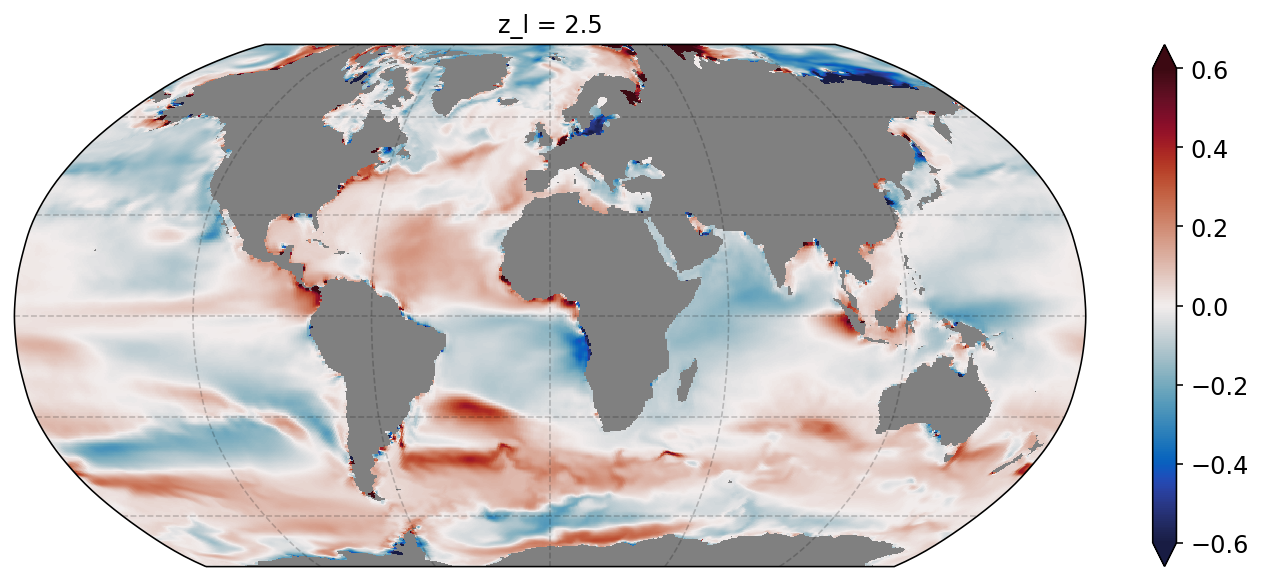

In [13]:
## plot using xarray

subplot_kws=dict(projection=ccrs.Robinson(),
                 facecolor='grey')

plt.figure(figsize=[12,8])
p = difference_stress.plot(vmin=-0.6,vmax=0.6,
              cmap=cmocean.cm.balance,
              subplot_kws=subplot_kws,
              transform=ccrs.PlateCarree(),
              add_colorbar=False)

p.axes.gridlines(color='black', alpha=0.2, linestyle='--')

# add a seperate colorbar
cb = plt.colorbar(p, ticks=[-0.6,-0.4,-0.2,0,0.2,0.4,0.6],shrink=0.6,extend='both')
cb.ax.tick_params(labelsize=12)

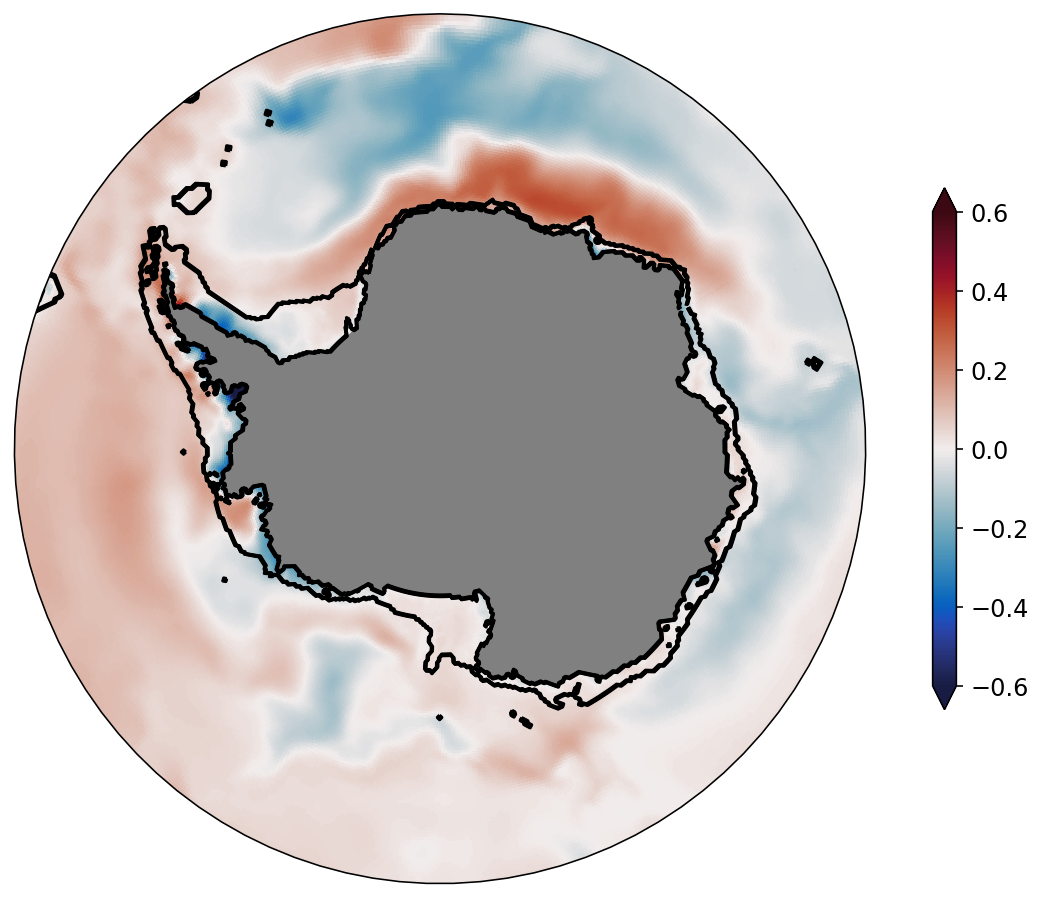

In [14]:
## plot using xarray

depth = ds_static['deptho']
depth

shelf = depth.where(depth<1000)*0
shelf_mask = shelf.isin(0)


import matplotlib.path as mpath

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)


plt.figure(figsize=[12,8])

projection=ccrs.SouthPolarStereo()
ax = plt.axes(projection=projection,facecolor='grey')
ax.set_extent([-180,180,-90,-55], ccrs.PlateCarree())
ax.set_boundary(circle,transform=ax.transAxes)

p = difference_stress.plot(x='xh', y='yh',
                        vmin=-0.6,vmax=0.6,
                        cmap=cmocean.cm.balance,
                        transform=ccrs.PlateCarree(),add_colorbar=False)

shelf_mask.plot.contour(x='xh', y='yh',transform=ccrs.PlateCarree(),colors='black')

cb = plt.colorbar(p, ticks=[-0.6,-0.4,-0.2,0,0.2,0.4,0.6],shrink=0.6,extend='both')
cb.ax.tick_params(labelsize=12)

In [ ]:
client.close()